My solutions for Homework1 in IE7275 Data Mining in Engineering

## Part 1: Data cleaning and pre-processing

### Problem 1 ##

Glass Identification Data

Source: https://archive.ics.uci.edu/ml/datasets/glass+identification

Creator: B. German 

    Central Research Establishment 

    Home Office Forensic Science Service 

    Aldermaston, Reading, Berkshire RG7 4PN 

Donor: Vina Spiehler, Ph.D., DABFT 

    Diagnostic Products Corporation 

In [ ]:
!pip install --upgrade openpyxl

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_excel("Glass_Identification_Data.xlsx") 
df.head()

Saving Glass_Identification_Data.xlsx to Glass_Identification_Data.xlsx


,ID,RI,Na,Mg,Al,Si,K,CA,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,NaN,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,NaN,0.0,1
2,3,NaN,13.53,3.55,1.54,72.99,0.39,7.78,NaN,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,NaN,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,NaN,0.0,1


**TODO1:**
*   Count the the **percentage** of null/missing values for each variable
*   Drop the variables which have more than 75% missing values *(Avoid manual intervention. Code should work even if the attribute/data changes)*

In [ ]:
# Count the the percentage of null/missing values for each variable
print(df.isnull().sum() / len(df) * 100)
print(df.shape)

ID        0.000000
RI        0.934579
Na        0.934579
Mg        7.943925
Al        0.000000
Si        0.467290
K         2.336449
CA        0.000000
Ba       78.037383
Fe        0.000000
Class     0.000000
dtype: float64
(214, 11)


In [ ]:
# Drop the variables which have more than 75% missing values (Avoid manual intervention. Code should work even if the attribute/data changes)
df.dropna(how='any', axis=1, thresh=df.shape[0]*0.75, inplace=True)
print(df.columns)
print(df.shape)

Index(['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'CA', 'Fe', 'Class'], dtype='object')
(214, 10)


**Hint:**

[Handle missing data in Python](https://machinelearningmastery.com/handle-missing-data-python/)

[dropna() thresh option](https://www.plus2net.com/python/pandas-dataframe-dropna-thresh.php)

Note: You can try other methods as well apart from the ones mentioned in the hint


**TODO2:**
*    If a variable contains more than 10 missing records, impute the records by using the mean value of records from the respective class instead of using the mean value of the entire column. *(Avoid manual intervention. Code should work even if the attribute/data changes)*
*   If a variable contains less than 10 missing records, impute the records with the previous non-NAN value from a row with the same 'Class' *(Avoid manual intervention. Code should work even if the attribute/data changes)*
* [What is imputation in Data Mining?](https://www.analyticsvidhya.com/blog/2021/06/defining-analysing-and-implementing-imputation-techniques/)

In [ ]:
# Explore the dataset
print(df.dtypes)
print(df['Class'].value_counts())
print(df.isnull().sum())
print(df[df.columns[df.isnull().sum() > 10]])
print(df.loc[:, df.isnull().sum() < 10])

ID         int64
RI       float64
Na       float64
Mg       float64
Al       float64
Si       float64
K        float64
CA       float64
Fe       float64
Class      int64
dtype: object
2    76
1    70
7    29
3    17
5    13
6     9
Name: Class, dtype: int64
ID        0
RI        2
Na        2
Mg       17
Al        0
Si        1
K         5
CA        0
Fe        0
Class     0
dtype: int64
       Mg
0    4.49
1    3.60
2    3.55
3    3.69
4    3.62
..    ...
209  0.00
210  0.00
211  0.00
212  0.00
213  0.00

[214 rows x 1 columns]
      ID       RI     Na    Al     Si     K    CA   Fe  Class
0      1  1.52101  13.64  1.10  71.78  0.06  8.75  0.0      1
1      2  1.51761  13.89  1.36  72.73  0.48  7.83  0.0      1
2      3      NaN  13.53  1.54  72.99  0.39  7.78  0.0      1
3      4  1.51766  13.21  1.29  72.61  0.57  8.22  0.0      1
4      5  1.51742  13.27  1.24  73.08  0.55  8.07  0.0      1
..   ...      ...    ...   ...    ...   ...   ...  ...    ...
209  210  1.51623  14.14  2.88 

In [ ]:
df_more_than_10 = df.loc[:, df.isnull().sum() > 10]
# In the description, 10 is not techically included. So I am including 10 in "less than"
df_less_than_10 = df.loc[:, df.isnull().sum() <= 10]

# Adding ID and Class columns to both dataframes since only one of the dataframes have these columns after filtering by the condition above, but we are not sure which dataframe it will be
df_more_than_10 = pd.concat([df_more_than_10, df['ID'], df['Class']], axis=1) 
df_less_than_10 = pd.concat([df_less_than_10, df['ID'], df['Class']], axis=1)

# Removing the duplicated ID and Class columns since one of the dataframes will have duplicated columns from the step above
df_more_than_10 = df_more_than_10.loc[:,~df_more_than_10.columns.duplicated()]
df_less_than_10 = df_less_than_10.loc[:,~df_less_than_10.columns.duplicated()]

print(df_more_than_10.shape)
print(df_more_than_10.isnull().sum())
print(df_less_than_10.shape)
print(df_less_than_10.isnull().sum())

(214, 3)
Mg       17
ID        0
Class     0
dtype: int64
(214, 9)
ID       0
RI       2
Na       2
Al       0
Si       1
K        5
CA       0
Fe       0
Class    0
dtype: int64


In [ ]:
# If a variable contains more than 10 missing records, impute the records by using the mean value of records from the respective class instead of using the mean value of the entire column. (Avoid manual intervention. Code should work even if the attribute/data changes)
# If a variable contains less than 10 missing records, impute the records with the previous non-NAN value from a row with the same 'Class' (Avoid manual intervention. Code should work even if the attribute/data changes)

# As discussed in the page below, groupby().transform() drops the column specified for the "by" parameter ("Class"). Thus, I concat Class column
# https://github.com/pandas-dev/pandas/issues/12495
df_more_than_10 = pd.concat([
                             df['Class'],
                             df_more_than_10.groupby(by=['Class']).transform(lambda x: x.fillna(x.mean()))
                             ],
                             axis=1)
df_less_than_10 = pd.concat([
                             df['Class'],
                             df_less_than_10.groupby(by=['Class']).transform(lambda x: x.fillna(method='ffill'))
                             ],
                             axis=1)

# References:
# https://stackoverflow.com/questions/16345583/fill-in-missing-pandas-data-with-previous-non-missing-value-grouped-by-key
# https://stackoverflow.com/questions/43130439/pandas-replace-nan-with-the-last-non-nan-value-in-column
# https://stackoverflow.com/questions/27905295/how-to-replace-nans-by-preceding-or-next-values-in-pandas-dataframe

print(df_more_than_10.columns)
print(df_less_than_10.columns)

Index(['Class', 'Mg', 'ID'], dtype='object')
Index(['Class', 'ID', 'RI', 'Na', 'Al', 'Si', 'K', 'CA', 'Fe'], dtype='object')


In [ ]:
# This is the final dataframe
df = df_more_than_10.merge(df_less_than_10, on=['ID', 'Class'])
df

,Class,Mg,ID,RI,Na,Al,Si,K,CA,Fe
0,1,4.49,1,1.52101,13.64,1.10,71.78,0.06,8.75,0.0
1,1,3.60,2,1.51761,13.89,1.36,72.73,0.48,7.83,0.0
2,1,3.55,3,1.51761,13.53,1.54,72.99,0.39,7.78,0.0
3,1,3.69,4,1.51766,13.21,1.29,72.61,0.57,8.22,0.0
4,1,3.62,5,1.51742,13.27,1.24,73.08,0.55,8.07,0.0
...,...,...,...,...,...,...,...,...,...,...
209,7,0.00,210,1.51623,14.14,2.88,72.61,0.08,9.18,0.0
210,7,0.00,211,1.51685,14.92,1.99,73.06,0.00,8.40,0.0
211,7,0.00,212,1.52065,14.36,2.02,73.42,0.00,8.44,0.0
212,7,0.00,213,1.51651,14.38,1.94,73.61,0.00,8.48,0.0


**Hint:** Consider using one or a combinition of [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.fillna.html), [groupby](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html), [transform](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html), and [mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) to compete this task

**TODO3:** Check if all the missing values are handled

In [ ]:
df.isnull().sum()

Class    0
Mg       0
ID       0
RI       0
Na       0
Al       0
Si       0
K        0
CA       0
Fe       0
dtype: int64

**Hint:** If you have done all the above mentioned steps properly, you shouldnt be getting NAN values

**TODO4:** Get the descriptive statistics of the predictors for each class and present the information in a table/matrix format

Also, what will you do if your data has non-numerical columns. How will you generate the summary for all columns of a DataFrame regardless of data type?

In [ ]:
df.groupby('Class').describe()

# To include all columns regardless of their data types, I can specify 'all' for the 'include' parameter such as:
# df.groupby('Class').describe(include='all')

Mg                                      ...   Fe                       
      count      mean       std   min       25%  ...  min  25%  50%    75%   max
Class                                            ...                            
1      70.0  3.554203  0.246597  2.71  3.480000  ...  0.0  0.0  0.0  0.110  0.31
2      76.0  3.405373  0.501037  1.01  3.405373  ...  0.0  0.0  0.0  0.155  0.35
3      17.0  3.543529  0.162786  3.34  3.400000  ...  0.0  0.0  0.0  0.090  0.37
5      13.0  1.676667  0.491353  0.33  1.676667  ...  0.0  0.0  0.0  0.000  0.51
6       9.0  1.305556  1.097134  0.00  0.000000  ...  0.0  0.0  0.0  0.000  0.00
7      29.0  0.538276  1.117683  0.00  0.000000  ...  0.0  0.0  0.0  0.000  0.09

[6 rows x 72 columns]

**Hint:** [How to calculate summary statistics with Pandas? ](https://www.w3resource.com/pandas/dataframe/dataframe-describe.php)

### Problem 2 ##

In [ ]:
#Import the built-in Titanic dataset for this problem
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**TODO1:** What is the mean age of female and male survivors respectively?

In [ ]:
survived = titanic[titanic['survived'] == 1]
survived.groupby('sex').mean()['age']

sex
female    28.847716
male      27.276022
Name: age, dtype: float64

**Hint:** Apart from the aforementioned function [groupby](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html), creating a [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) is also a way to go.

**TODO2:** Among all the survivors, what is the gender distribution? (You are expected to present the percentage of each gender in a pivot table.)

In [ ]:
pd.pivot_table(survived, index='sex', values='survived', aggfunc = lambda x: len(x) / len(survived) * 100)

,survived
sex,
female,68.128655
male,31.871345


**Hint:** The [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) can help with complex aggregation.

**TODO3:** How many children (age <= 12) survived and which class ticket they had?

In [ ]:
pd.pivot_table(survived[survived['age'] <= 12], index='class', values='survived', aggfunc = lambda x: len(x))

,survived
class,
First,3
Second,17
Third,20


**Hint:** 

[Ways to filter pandas dataframe based on column values](https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/)

[Using pandas groupby count()](https://datascienceparichay.com/article/pandas-groupby-count-of-rows-in-each-group/)


**TODO4:** How many first class seated girls (children) DID NOT survive?

In [ ]:
pd.pivot_table(titanic.loc[(titanic['survived'] == 0) & (titanic['who'] == 'child')],
               index='class',
               columns=['sex'],
               values='survived',
               aggfunc= lambda x: len(x))

# Answer: 1 first class searted girl

sex,female,male
class,,
First,1.0,NaN
Third,14.0,19.0


**TODO5:** Check whether variable 'survived' and 'alive' are consistent (contains the same information). Is there any other redundant variable existing in this dataset? Drop all the redundant variables and present the updated dataset.

In [ ]:
# Check whether variable 'survived' and 'alive' are consistent (contains the same information).

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(titanic['alive'])
print(le.classes_)

df_temp = pd.DataFrame(le.transform(titanic['alive']), columns=['alive_c'])
print(titanic['survived'].equals(df_temp['alive_c']))

# Answer: 'survived' and 'alive' are consistent.

['no' 'yes']
True


In [ ]:
# Is there any other redundant variable existing in this dataset?

titanic.head()
# https://www.geeksforgeeks.org/python-titanic-data-eda-using-seaborn/
# https://jkarakas.github.io/Exploratory-Analysis-of-the-Titanic-Dataset/Titanic_Dataset_Exploratory_Analysis._With_Code.html

# Looking at some rows and columns descriptions listed in the websites below, the following columns seems to contain the same information:
# 1. pclass, class
# 2. sex, who (*)
# 3. embarked, embark_town

# (*) Although the adult_male column contains the similar information as "2. sex, who", this column also refers to whether he is an adult.
# This is why this column is not included in the above list.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 1. pclass, class

# Looking at the head() of the dataframe, it seems like pclass 1 corresponds to class First, pclass 2 corresponds to class Second, and pclass 3 corresponds to class Third.
print(titanic['pclass'].value_counts())
print(titanic['class'].value_counts())

le = preprocessing.LabelEncoder()
le.fit(titanic['class'])

df_temp = pd.DataFrame(le.transform(titanic['class']), columns=['class_c'])

# Since class_c column has First as 0, Second as 1, and Third as 2, I will add 1 to each value in the column.
df_temp = df_temp + 1

# pclass and class columns are consistent.
print(titanic['pclass'].equals(df_temp['class_c']))

3    491
1    216
2    184
Name: pclass, dtype: int64
Third     491
First     216
Second    184
Name: class, dtype: int64
True


In [ ]:
# 2. sex, who

# These columns actually contain the different information.
print(titanic['sex'].value_counts())
print(titanic['who'].value_counts())

male      577
female    314
Name: sex, dtype: int64
man      537
woman    271
child     83
Name: who, dtype: int64


In [ ]:
# 3. embarked, embark_town
print(titanic['embarked'].value_counts())
print(titanic['embark_town'].value_counts())

le_1 = preprocessing.LabelEncoder()
le_1.fit(titanic['embarked'])
df_temp = pd.DataFrame(le_1.transform(titanic['embarked']), columns=['embarked_c'])

le_2 = preprocessing.LabelEncoder()
le_2.fit(titanic['embark_town'])
df_temp['embark_town_c'] = le_2.transform(titanic['embark_town'])

# embarked and embark_town columns are consistent.
print(df_temp['embarked_c'].equals(df_temp['embark_town_c']))

S    644
C    168
Q     77
Name: embarked, dtype: int64
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
True


In [ ]:
# Drop all the redundant variables and present the updated dataset.

# From the observations above, I will drop the redundant columns below:
# 1. Keep: survived, Drop: alive
# 2. Keep: class, Drop: pclass
# 4. Keep: embark_town, Drop: embarked

titanic_updated = titanic.drop(['alive', 'pclass', 'embarked'], axis=1, inplace=False)
titanic_updated.head()

,survived,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,False
1,1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,True
3,1,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,True


**Hint:** 

You might want to encode two variables to 0 and 1 with [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) and check if two columns contain the same value.

Or else you can use [Replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

**TODO6:** What other insights can you draw from this dataset? Present one finding through pivot table.

In [ ]:
pd.pivot_table(titanic_updated,
               index=['class', 'sex'],
               columns=['survived'],
               values='parch',
               aggfunc= lambda x: len(x),
               margins=True)

# Finding: 
# It is very interesting to see that in the First and Second class, the female survival rate is much higher than the male survival rate.
# For instance, for the First class, the female survival rate was 0.968 (91/94), whereas the male survival rate was 0.369 (45/122).

survived         0    1  All
class  sex                  
First  female    3   91   94
       male     77   45  122
Second female    6   70   76
       male     91   17  108
Third  female   72   72  144
       male    300   47  347
All            549  342  891

## Part 2: Data Visualization 

### Problem 3

Dataset: Forest fires

Source: https://archive.ics.uci.edu/ml/datasets/Forest+Fires

The file forestfires.csv includes data from Cortez and Morais (2007).

Number of instances and attributes are 517 and 13 respectively.  

Attribute Information:
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the `year`: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84

(this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).


In [ ]:
#Importing libraries and loading the dataset 'forestfires.csv'

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("forestfires.csv") 
df.head()

Saving forestfires.csv to forestfires (2).csv


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


**TODO1:** Plot a stacked bar chart to show the number of forest fires grouped by months and days of the week. *(Make sure the month are in Months chronological order i.e attribute values are sorted starting with January and ending with December)* 

In [ ]:
print(df['month'].value_counts())
print(df['day'].value_counts())

# Count the number of forest fires grouped by month and day
df_temp = df.groupby(['month', 'day'], as_index=False).size()

month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
day_order = ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']

# Make month and day columns sortable in the above order
df_temp['month'] = pd.Categorical(df_temp['month'], categories=month_order, ordered=True)
df_temp['day'] = pd.Categorical(df_temp['day'], categories=day_order, ordered=True)

# Rename size column to count
df_temp = df_temp.rename(columns = {'size': 'count'})
print(df_temp.columns)

# Sort dataframe by month and day
df_temp = df_temp.sort_values(['month', 'day'])

# Convert from a long format to a wide format
pivot = pd.pivot_table(data=df_temp, index=['month'], columns=['day'], values='count')


# References:
# https://datascienceparichay.com/article/pandas-groupby-count-of-rows-in-each-group/
# https://medium.com/@jb.ranchana/easy-way-to-create-stacked-bar-graphs-from-dataframe-19cc97c86fe3

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64
Index(['month', 'day', 'count'], dtype='object')


Text(0, 0.5, 'Count of Forest Fires')

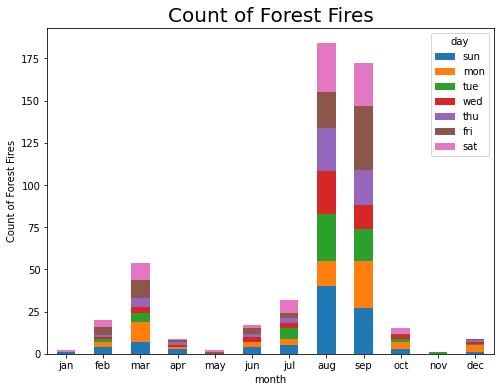

In [ ]:
ax = pivot.plot.bar(stacked=True, figsize=(8,6), rot=0)

ax.set_title('Count of Forest Fires', fontsize=20)
ax.set_ylabel('Count of Forest Fires')

**Hint:** Before creating the bar chart, use aforementioned data aggregation tools to transform the original dataset to the data frame you need for this section. To be more specific, you need to compute the count of forest fires by months and days before plotting.

Then [build a stacked bar chart with Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)

**TODO2 (not graded):** Do you notice any problem with the stacked bar chart? How do you plan to remedy this problem?

Answer:

Although I can see the total number of forest fires for each month, it is very difficult to read/know how many forest fires there were each day (e.g. sun, mon, tue, etc...). One way to resolve this difficuly is to make this chart interactive so that when hovering over one section of a bar, it shows the number of forest fires for that specific day.

**TODO3:** Create a scatter plot of the fires with the location(X & Y) as the X and Y axis, and the size of the point indicating the area burnt. 

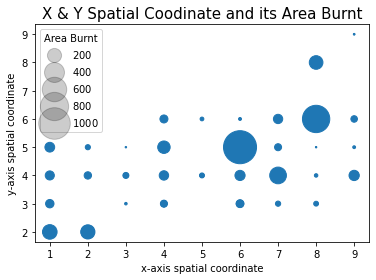

In [ ]:
fig, ax = plt.subplots()

scatter = ax.scatter(df['X'], df['Y'], s=df['area'])

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.2, num=6)
legend = ax.legend(handles, labels, loc="upper left", title="Area Burnt")

ax.set_title('X & Y Spatial Coodinate and its Area Burnt', fontsize=15)
ax.set_xlabel("x-axis spatial coordinate")
ax.set_ylabel("y-axis spatial coordinate")

plt.show()

# References:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html

**Hint:** [Build a scatter plot with Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html)

**TODO4:** Plot the scatter matrix for temp, RH, DC and DMC. How do you interpret the result in terms of correlation among the variables?

Text(0.5, 0.98, 'Scatter Matrix')

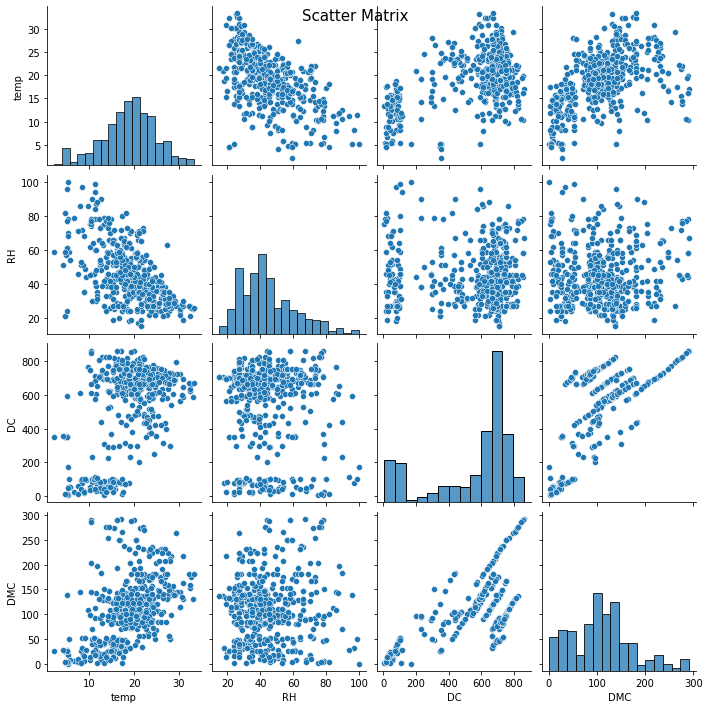

In [ ]:
sm = sns.pairplot(df[['temp', 'RH', 'DC', 'DMC']])
plt.suptitle("Scatter Matrix", fontsize=15)

# Looking at this matrix, among all combinations of variables, DC & DMC variables seems to have the highest positive correlation. Although some pairs such as temp & RH or DMC & temp also seem to have some correlations, but it is hard to tell which pair is more correlated simply by this visualization.

**Hint:** [Creat a scatter matrix with Seaborn](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

**TODO5:** Does the wind speed affect the spread of wildfire? Use visualization to back up your answer.

Text(0.5, 1.0, 'wind vs area')

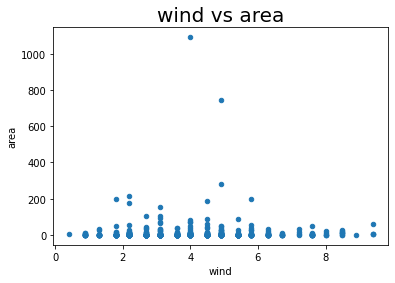

In [ ]:
ax = df[['wind', 'area']].plot.scatter(x='wind', y='area')
ax.set_title('wind vs area', fontsize=20)

# Based only on this visualization, there seems to be no correlation between wind and area variabels, and therefore the wind speed does not affect the spread of wildfire.

### Problem 4


Dataset: Graduate School Admission 

This dataset was created for Graduate Admissions prediction.

The purpose is to help students with shortlisting target universities according to their profiles. 

The predicted output gives them a fair idea about their chances of admission for a particular university.

Attribute Information: 

Serial.No.: application number: 1 to 500 

GRE.Score: GRE score: 290 to 340 

TOEFL.Score: TOEFL score: 92 to 120 

University.Rating: undergraduate school’s rating: A to E 

SOP: Statement of Purpose score: 1 to 5 

LOR: Letter of Recommendation score: 1 to 5 

CGPA: Undergraduate GPA: 6.8 to 9.92 

Research: Research experience: Yes or No 

Chance.of.Admit: Chance of getting admitted: 0.34 to 0.97

In [ ]:
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("Admission_Predict.csv") 
df.head()

Saving Admission_Predict.csv to Admission_Predict (3).csv


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,yes,0.92
1,2,324,107,4,4.0,4.5,8.87,yes,0.76
2,3,316,104,3,3.0,3.5,8.00,yes,0.72
3,4,322,110,3,3.5,2.5,8.67,yes,0.80
4,5,314,103,2,2.0,3.0,8.21,no,0.65


**TODO1:** Is LOR score related to CGPA? Use visualization to back up your answer.

Text(0.5, 1.0, 'LOR vs CGPA')

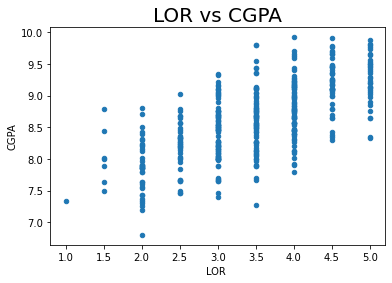

In [ ]:
ax = df.plot.scatter(x='LOR ', y='CGPA')
ax.set_title('LOR vs CGPA', fontsize=20)

# Yes, LOR score seems to be related to and has some positive corelation with CGPA.

**Hint:** Use the visualization that is used to compare 2 numerical variables

**TODO2:** 
*   Create a scatterplot of CGPA and GRE. Use color to indicate research experience. Interpret the plot. 

*   Create a scatterplot of University.Rating vs Research. Why is the plot not useful? Pick an appropriate chart type to reveal the relationship between University.Rating and Research.


Text(0.5, 0.98, 'CGPA vs GRE')

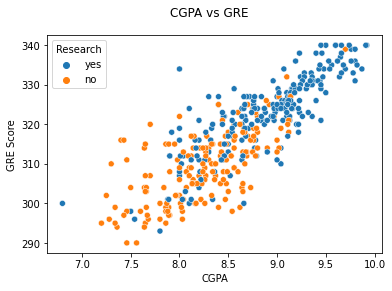

In [ ]:
# Create a scatterplot of CGPA and GRE. Use color to indicate research experience. Interpret the plot.
sns.scatterplot(data=df, x='CGPA', y='GRE Score', hue='Research')
plt.suptitle('CGPA vs GRE')

# We can see that GRE Score and CGPA are postively correlated. The higher GRE Score is, the higher CGPA tends to be. In addition, applicants with research experience tend to have better GRE Score and CGPA.

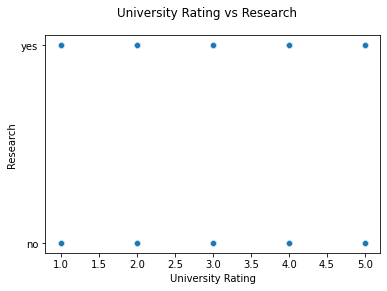

In [ ]:
# Create a scatterplot of University.Rating vs Research. Why is the plot not useful? Pick an appropriate chart type to reveal the relationship between University.Rating and Research.
sns.scatterplot(data=df, x='University Rating', y='Research')
plt.suptitle('University Rating vs Research')
plt.show()

# This plot is not useful because Research is a categorical variable and does not really show the relationship between two variables. 

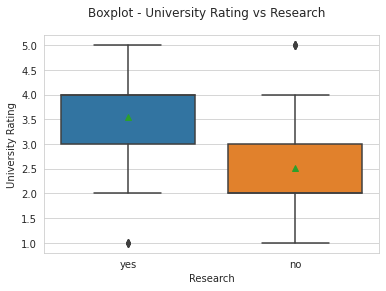

In [ ]:
# One of appropriate chart types in this case would be a box plot.
sns.set_style("whitegrid")
boxplot = sns.boxplot(data=df, x='Research', y='University Rating', showmeans=True)
plt.suptitle('Boxplot - University Rating vs Research')
plt.show()

**TODO3:** Plot a pie chart of University Rating. The pie chart should also present the percentage of each slice. Explain your findings. *(Make sure you show data labels)*

In [ ]:
print(df['University Rating'].value_counts())

df_pie = df.groupby('University Rating').size()
print(df_pie)

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64
University Rating
1     26
2    107
3    133
4     74
5     60
dtype: int64


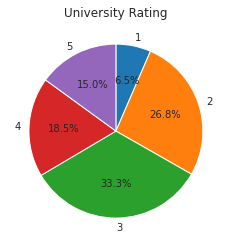

In [ ]:
ax = df_pie.plot.pie(autopct='%1.1f%%', counterclock=False, startangle=90, y='University Rating', title='University Rating', legend=False)
ax.set_ylabel('')
plt.show()

# We can see that the highest number of applicants are from the Rate 3 undergraduate schools, whereas the least number of applicants are from the Rate 1 undergraduate school.

**Hint:** [Build a pie chart with Matplotlib](https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html)

[Build a pie chart with Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

**TODO4:** What other insights can you draw from this dataset? Present one finding with visualization.

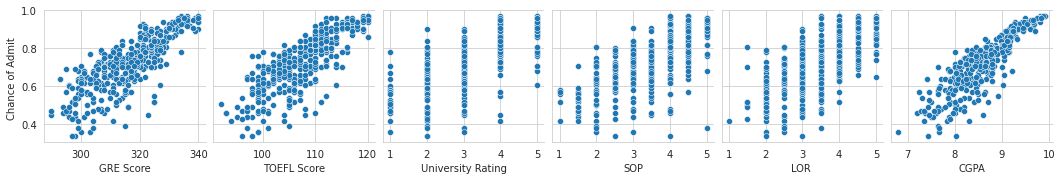

In [ ]:
sns.pairplot(df, y_vars=['Chance of Admit '], x_vars=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA'])

# We can see that CGPA has the highest positive correlation with the 'Chance of Admit' variable

In [ ]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.873289
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,1.000000
